### 사용하는 데이터

- daily-minimum-temperatures-in-me.csv

### Time Series Plot

- Line Plot
- Histogram and Density Plot
- Box and Whisker Plot
- Heat map
- Lag Plots and Scatter Plots
- Autocorrelation Plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data Cleansing

In [4]:
df = pd.read_csv("../daily-minimum-temperatures-in-me.csv", header=0, index_col=0, error_bad_lines=False)

b'Skipping line 3653: expected 2 fields, saw 3\n'


In [5]:
df.columns = ['temps']

In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
def clean(x):
    try:
        return float(x)
    except:
        return None

In [8]:
df['temps'] = df['temps'].apply(lambda x: clean(x))

In [9]:
df.fillna(method='ffill', inplace=True)

In [10]:
df.head()

,temps
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


# 1. Line Plot

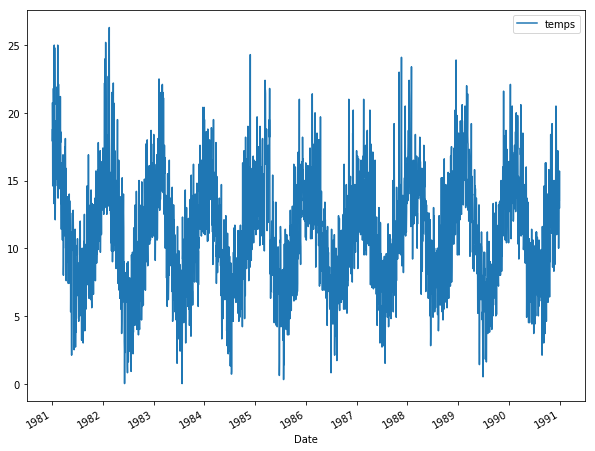

In [11]:
df.plot(figsize=(10,8))
plt.show()

- 너무 Dense 하다.

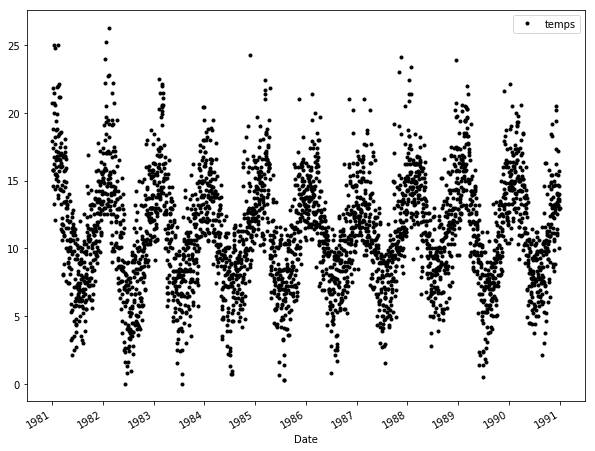

In [12]:
df.plot(figsize=(10,8), style='k.')

/anaconda3/envs/base-workspace/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


1981-12-31 00:00:00
1982-12-31 00:00:00
1983-12-31 00:00:00
1984-12-31 00:00:00
1985-12-31 00:00:00
1986-12-31 00:00:00
1987-12-31 00:00:00
1988-12-31 00:00:00
1989-12-31 00:00:00
1990-12-31 00:00:00


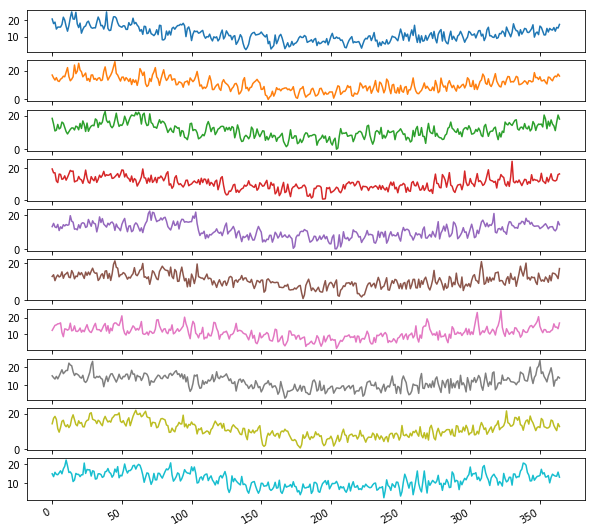

In [13]:
years = pd.DataFrame()
groups = df.groupby(pd.TimeGrouper('A'))
for name, group in groups:
    print(name)
    years[name.year] = group['temps'].values
years.plot(subplots=True, legend=False, figsize=(10,10))    
plt.show()

# 2. Histogram and Density Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x115f24a20>]],
      dtype=object)

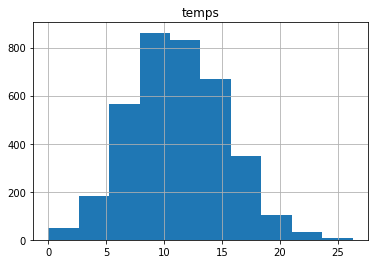

In [14]:
# y값 = frequency
df.hist()

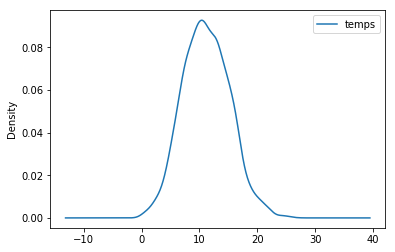

In [15]:
# kernel
df.plot(kind='kde')

# 3. Box and Whisker Plot by Interval

- Outlier 찾아내기 좋다.

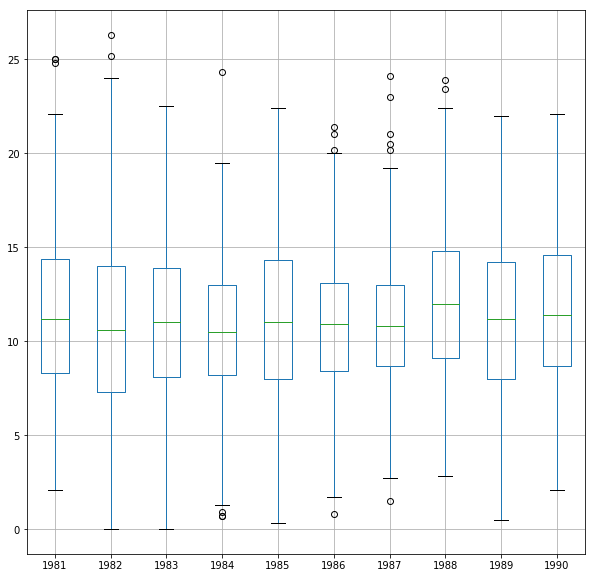

In [16]:
#years
groups = df.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()
for name, group in groups:
    years[name.year] = group['temps'].values
years.boxplot(figsize=(10,10))

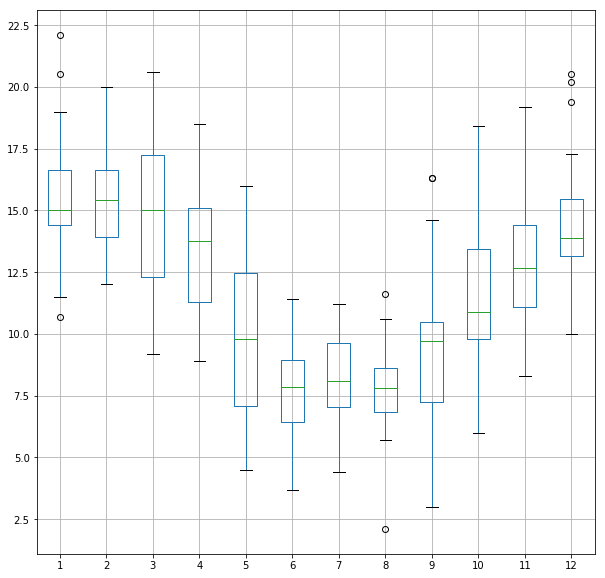

In [58]:
# year
one_year = df['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups['temps']], axis=1)
months = pd.DataFrame(months)
months.columns = range(1, 13)
months.boxplot(figsize=(10,10))

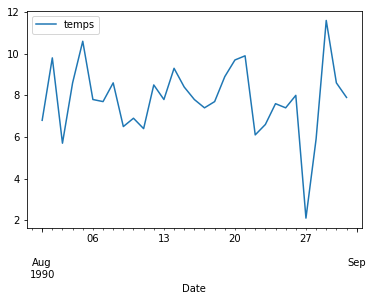

In [60]:
one_month = df['1990-08']
one_month.plot()

# 4. Heat Map

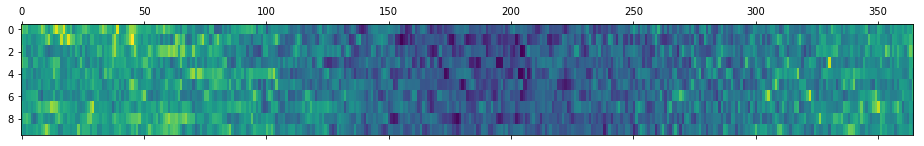

In [65]:
years = pd.DataFrame()
groups = df.groupby(pd.Grouper(freq='A'))
for name, group in groups:
    years[name.year] = group['temps'].values
years = years.T
plt.matshow(years, aspect='auto')

- 연의 중간이 덥다.

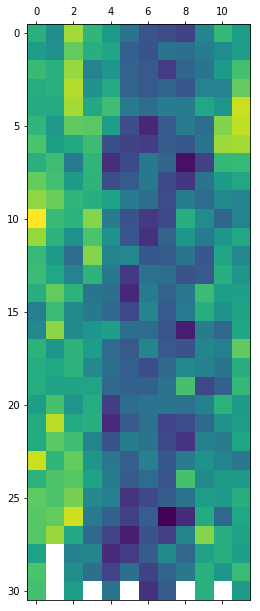

In [66]:
one_year = df['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups['temps']], axis=1)
months = pd.DataFrame(months)
months.columns = range(1, 13)
plt.matshow(months, aspect='auto')

- 31일까지 없는 날들은 값이 빈다.

# 5. Lag Scatter Plot

- Lag 1을 기준으로 그려진다.

/Users/sailyourlife/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


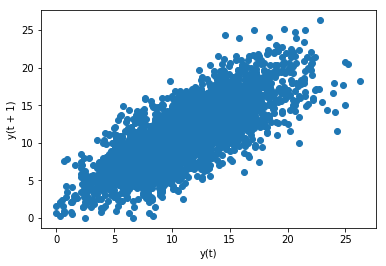

In [67]:
# lags에 따라서 
from pandas.tools.plotting import lag_plot
lag_plot(df['temps'])

In [73]:
lags = 7
columns = [df]
for i in range(1, (lags + 1)):
    columns.append(df.shift(i))
dataframe = pd.concat(columns, axis=1)

In [75]:
columns = ['t+1']
for i in range(1, (lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns

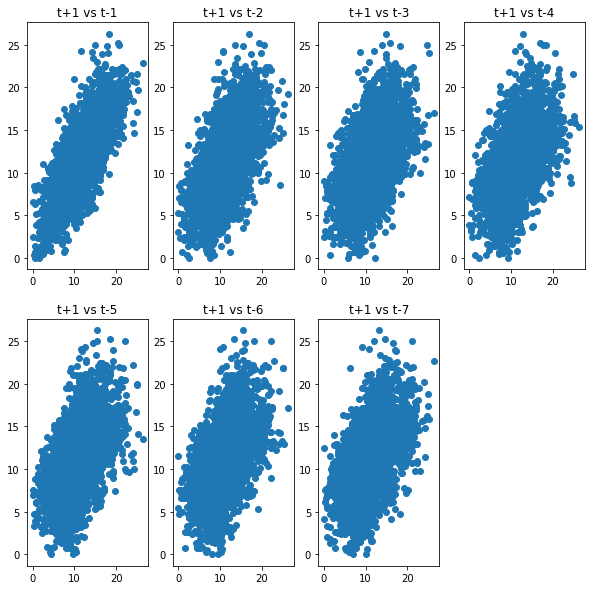

In [79]:
fig = plt.figure(1, figsize=(10,10))

for i in range(1, (lags + 1 )):
    ax = plt.subplot(240 + i)
    ax.set_title('t+1 vs t-' + str(i))
    plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)

# 6. Autocorrelation Plot

- X 축은 시차(Xt - Xt+k)
- Y 축은 상관 계수

/Users/sailyourlife/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


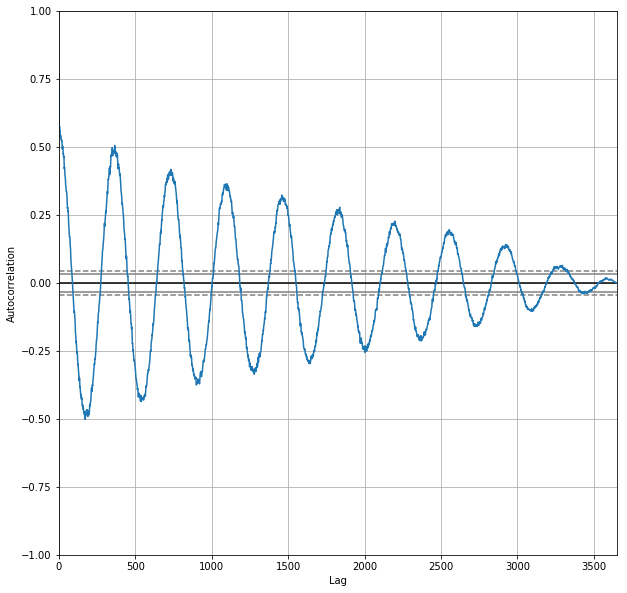

In [81]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(1, figsize=(10,10))
autocorrelation_plot(df['temps'])